## Introduction

The two datasets included in this analysis are `us_census_data.csv`, which includes data from the 2010 US Census and projections for populations in 2016, and `gun_data.xlsx`, which comes from the FBI's National Instant Criminal Background Check System (NCIS), which is used by to determine whether a prospective buyer is eligible to buy firearms.

These datasets will be used to answer the following questions:

1. Which states saw increased interest in firearm ownership as a proportion of their population?
2. What does is relationship between firearm interest and population density by state?
3. Which state holds the greatest interest in firearm ownership as a propotion of their population?
4. Which states hold the descrease interest in firearm ownership as a propotion of their population?
5. What is the overall trend in gun interest between 2010 and 2016?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

census_data = pd.read_csv('us_census_data.csv', encoding='utf-8')

To wrangle `census_data.csv`, the following must be accomplished:

* Dropping of unnecessary data. For this analysis, we will not be considering data involving racial makeup or data involving economics. We are only looking at population changes
* Conversion of relevant datatypes
* Adjustments of population data to only include persons over the age of 18, the federally required minimum age for purchasing a firearm.
* Further adjustments to population density to reflect the density of eligible firearm owners

In [7]:
def convert_to(series, type_):
    """Returns a number from a comma-seperated string"""
    return series.str.replace(',', '').astype(type_)


def convert_from_percent(series):
    """Returns a number from a string container percent%"""
    tmp = list()
    for x in series:
        if type(x) == str and x.find('%'):
            x = x.replace('%', '')
        x = float(x)
        if x > 1:
            x /= 100
        tmp.append(round(x, 4))
    return tmp


def adjust_pop(series1, series2):
    """Returns an integer from a population adjustment for persons < 18 years old"""
    result = series1 * (1 - series2)
    return result.astype(int)


def pop_increase(original, later):
    """Returns the population increase of two populations"""
    return round(abs((original - later) / original), 4)

# Prelimary cleanup of important data for census_data
del census_data['Fact Note']

# Looking only at pop in 2010 and 2016, plus underage
# pop changes will be meaningless because we only need to acct for adults
to_drop = [1, 2, 4, 5, *range(8, 62), *range(64, 85)]
census_data.drop(census_data.index[to_drop], inplace=True)
census_data = census_data.transpose()
census_data.drop(index='Fact', inplace=True)

# Rename columns
census_data.columns = ['pop_2016', 'pop_2010', 'underage_2016', 'underage_2010', 'density', 'area']
census_data = census_data[['pop_2010', 'pop_2016', 'underage_2016', 'underage_2010', 'density', 'area']]

# Make conversions for data types in census_data
census_data['pop_2016'] = convert_to(census_data['pop_2016'], int)
census_data['pop_2010'] = convert_to(census_data['pop_2010'], int)
census_data['density'] = convert_to(census_data['density'], float)
census_data['area'] = convert_to(census_data['area'], float)

census_data['underage_2010'] = convert_from_percent(census_data['underage_2010'])
census_data['underage_2016'] = convert_from_percent(census_data['underage_2016'])

# population less peoples < 18 years old
census_data['pop_2016'] = adjust_pop(census_data['pop_2016'], census_data['underage_2016'])
census_data['pop_2010'] = adjust_pop(census_data['pop_2010'], census_data['underage_2010'])

# Density will be calculated using 2016 population estimates of adults
census_data['density'] = round((census_data['pop_2016'] / census_data['area']).astype(float), 4)
census_data['pop_change'] = census_data.pct_change(axis=1)['pop_2016']

del census_data['underage_2016']
del census_data['underage_2010']
del census_data['area']

In [8]:
census_data

,pop_2010,pop_2016,density,pop_change
Alabama,3646938,3764194,74.3246,0.032152
Alaska,522730,554936,0.9725,0.061611
Arizona,4762052,5302269,46.6773,0.113442
Arkansas,2204434,2283021,43.8743,0.035650
California,27940467,30144013,193.5047,0.078866
Colorado,3802072,4277300,41.2700,0.124992
Connecticut,2755628,2821820,582.7365,0.024021
Delaware,692307,747371,383.5544,0.079537
Florida,14796630,16469338,307.1219,0.113047
Georgia,7197926,7794640,135.5272,0.082901


## Gun Data

For `gun_data.xlsx`, the data will be wrangled in the following ways:

* Irrelevant data will be dropped. We will not be looking at the sources of NCIS background checks, rather the totality of them
* The admin column is noise and must be removed from the totals
* The data we are looking at will be annualized, so monthly data will be compounded into yearly returns for each state
* Thus, any years that are incomplete in recording must also be dropped
* Furthermore, for years in which we have census data (2010 and 2016), a seperate DataFrame is used to compare against census_data
* Numbers are represented appropriately

In [10]:
# Begin with gun_data
gun_data = pd.read_excel('gun_data.xlsx', encoding='utf-8')
figsize = (15, 10)

#Extract the year from the month column
gun_data['year'] = gun_data['month'].str.extract(r'^(\d{4})')
gun_data.index = gun_data['state']

# Admin is noise and needs to be adjusted from totals
to_drop = [*range(9,26)]
gun_data.drop(columns=gun_data.columns[to_drop], inplace=True)
gun_data['totals'] = gun_data['totals'] - gun_data['admin']
del gun_data['admin']

# Drop territories from gun_data
states = set(census_data.index)
gun_state = set(gun_data.index)
drop_territories = gun_state.difference(states)
gun_data.drop(drop_territories, axis=0, inplace=True)

# Correct values in the DataFrame
corrections = list(gun_data.columns)[2:-1]
for column in corrections:
    gun_data[column] = gun_data[column].fillna(0)
    gun_data[column] = gun_data[column].astype(int)
    
    # Create DataFrames for matching census years
gun_data_2016 = gun_data[gun_data['year'] == '2016']
gun_data_2010 = gun_data[gun_data['year'] == '2010']

values = list(gun_data.columns)[2:-1]

# Sums the values of the two census years, disregarding month
def grouper_func(df, lvl='level', series='state'):
    if lvl == 'level':
        return df.groupby(level=series)[values].apply(lambda x: x.sum())
    else:
        return df.groupby(by=series)[values].apply(lambda x: x.sum())

gun_data_2016 = grouper_func(gun_data_2016)
gun_data_2010 = grouper_func(gun_data_2010)

gun_data_2016['pop_2016'] = census_data['pop_2016']
gun_data_2010['pop_2010'] = census_data['pop_2010']

# Statistics for 2010
total_checks_2010 = gun_data_2010['totals'].sum()
total_pop_2010 = gun_data_2010['pop_2010'].sum()
#gun_data_2010['percent_pop_check_2010'] = total_checks_2010 / total_pop_2010

# Statistics for 2016
total_checks_2016 = gun_data_2016['totals'].sum()
total_pop_2016 = gun_data_2016['pop_2016'].sum()
#gun_data_2016['percent_pop_check_2016'] = total_checks_2016 / total_pop_2016

gun_stats_by_year = grouper_func(gun_data, 'column', series='year')
# Drop incomplete years
gun_stats_by_year.drop(axis=0, index=['1998','2017'], inplace=True)

gun_data_2016['pop_share'] = gun_data_2016['totals'] / gun_data_2016['pop_2016']
gun_data_2010['pop_share'] = gun_data_2010['totals'] / gun_data_2010['pop_2010']

## Exploratory Data Analysis

Now that the data has been wrangled, and the DataFrames have been adjusted for easy state-by-state comparisons, it's time to look through the data and begin to understand what trends we may be able to find.

Comparisons between states in this scenario are best done as a share of its adult population due to the varying distributions of size and population for each state. We've adjusted for the adult population in the wrangling phase. We'll be looking at the following statistics:

* Increase in gun background checks between 2010 and 2016 as a share of population
* Mean increase year-over-year for all states from the beginning of the gun_data.xlsx spreadsheet

In [12]:
# New results DataFrame
results = pd.DataFrame(index=states)
# Total background checks as a share of the population
results['pop_change'] = census_data['pop_change']
results['delta_checks_2016_2010'] = gun_data_2016['pop_share'] - gun_data_2010['pop_share']
results['delta_pop_to_checks'] = results['delta_checks_2016_2010'] - results['pop_change']
results.head()

,pop_change,delta_checks_2016_2010,delta_pop_to_checks
Arizona,0.113442,0.035240,-0.078202
Montana,0.064563,0.034951,-0.029612
Georgia,0.082901,0.032344,-0.050557
North Carolina,0.080888,0.030979,-0.049909
Colorado,0.124992,0.047248,-0.077744


For the purposes of this analysis, changes in gun interest are measured in proportion to changes in the population over the same period. For this purpose, the census data is measured against the NCIS statistics for the same years, and compared against the population of each state as a whole.

The results above show three $\Delta$s:

1. `pop_change` signifies change in population between 2010 and 2016, expressed as a percent.
2. `delta_checks_2016_2010` signifies change in background checks between 2010 and 2016, expressed as a percent.
3. `delta_pop_to_checks` signifies change in proportion of checks to population between 2010 and 2016, expressed as a percent.

### How many states saw increased interest in firearm ownership?

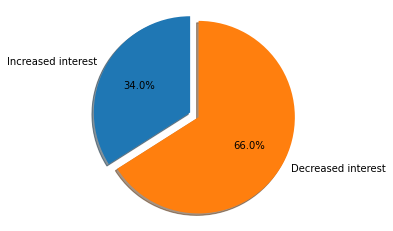

In [13]:
increased_interest = results['delta_pop_to_checks'].loc[results['delta_pop_to_checks'] > 0]
decreased_interest = results['delta_pop_to_checks'].loc[results['delta_pop_to_checks'] < 0]

# Pie chart setup
labels = ['Increased interest', 'Decreased interest']
values = [increased_interest.count(), decreased_interest.count()]
explode = (0.1, 0) 
fig1, ax1 = plt.subplots()

# Plotting
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### What was the correlation between interest in firearms and population density?

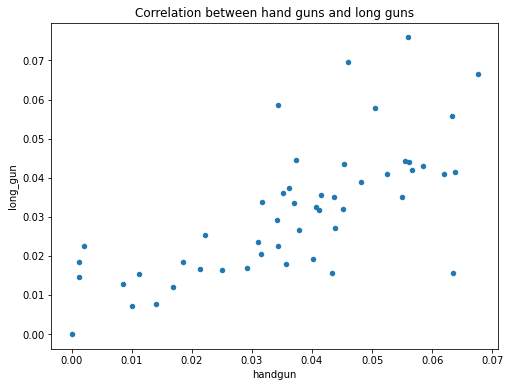

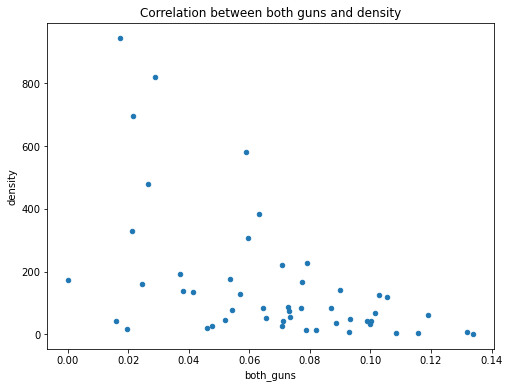

In [14]:
# Specific firearm types vs. density
gun_correlation = pd.DataFrame(index=states)
gun_correlation['handgun'] = gun_data_2016['handgun'] / census_data['pop_2016']
gun_correlation['long_gun'] = gun_data_2016['long_gun'] / census_data['pop_2016']
gun_correlation['both_guns'] = (gun_data_2016['handgun'] + gun_data_2016['long_gun']) / census_data['pop_2016']
gun_correlation['density'] = census_data['density']

# Calculate correlations
handguns = gun_correlation['handgun']
longguns = gun_correlation['long_gun']

both_guns = round(gun_correlation['both_guns'].corr(gun_correlation['density']), 4)
handgun_longgun = round(handguns.corr(longguns), 4)

title1 = 'Correlation between hand guns and long guns'
title2 = 'Correlation between both guns and density'

gun_correlation.plot.scatter(x='handgun', y='long_gun', figsize=(8, 6), title=title1)
gun_correlation.plot.scatter(x='both_guns', y='density', figsize=(8, 6), title=title2)
plt.show()

In [15]:
print(gun_correlation.corr(),'\n')
print('Correlation between gun interest and population density: ', both_guns)
print('Correlation between interst in handguns and interst in long guns: ', handgun_longgun)

            handgun  long_gun  both_guns   density
handgun    1.000000  0.706849   0.930529 -0.381879
long_gun   0.706849  1.000000   0.916793 -0.566030
both_guns  0.930529  0.916793   1.000000 -0.508646
density   -0.381879 -0.566030  -0.508646  1.000000 

Correlation between gun interest and population density:  -0.5086
Correlation between interst in handguns and interst in long guns:  0.7068


### Which state saw the greatest interest in firearm ownership? Which saw the smallest?

In [16]:
print(results['delta_checks_2016_2010'].describe())
print(results.iloc[results['delta_checks_2016_2010'].argmax()])
print(results.iloc[results['delta_checks_2016_2010'].argmin()])

count    50.000000
mean      0.047243
std       0.061705
min      -0.153689
25%       0.029150
50%       0.039050
75%       0.052394
max       0.353872
Name: delta_checks_2016_2010, dtype: float64
pop_change                0.033200
delta_checks_2016_2010    0.353872
delta_pop_to_checks       0.320672
Name: Kentucky, dtype: float64
pop_change                0.124910
delta_checks_2016_2010   -0.153689
delta_pop_to_checks      -0.278599
Name: Utah, dtype: float64


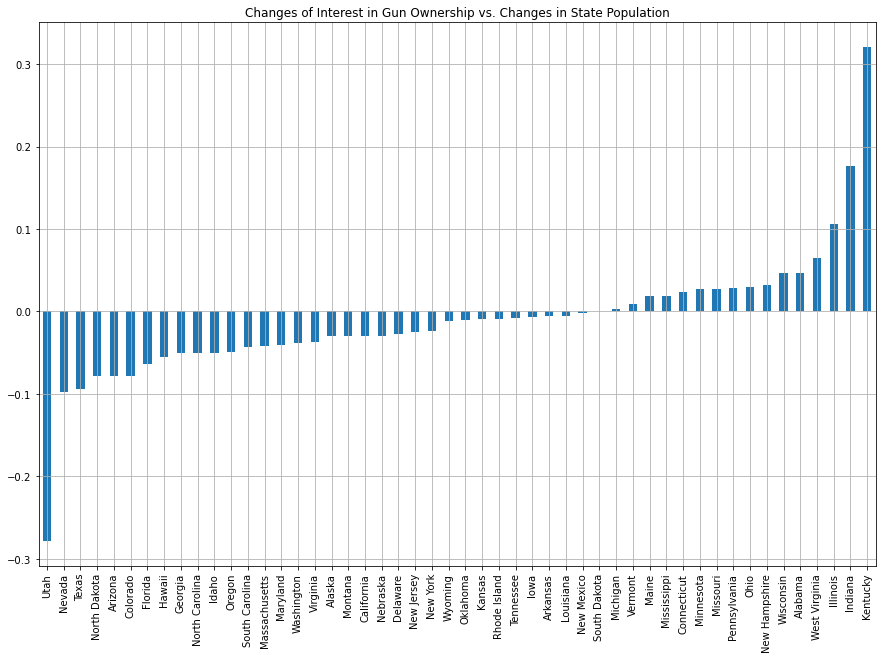

In [17]:
title = 'Changes of Interest in Gun Ownership vs. Changes in State Population'
results['delta_pop_to_checks'].sort_values().plot.bar(figsize=figsize, title=title, grid=True)
plt.show()

**Kentucky** saw the greatest interest in firearm ownership as a proportion of their population increase:

    State with greatest increase: 
    pop_change                0.033200
    delta_checks_2016_2010    0.353872
    delta_pop_to_checks       0.320672
    Name: Kentucky, dtype: float64


While **Utah** saw the greatest decrease in firearm ownership:

    State with smallest increase (decrease): 
    pop_change                0.124910
    delta_checks_2016_2010   -0.153689
    delta_pop_to_checks      -0.278599
    Name: Utah, dtype: float64

### What is the spread in deltas for population, background checks, and population vs. background checks?

In [18]:
print('Changes in US population')
census_data['pop_change'].describe()

Changes in US population


count    50.000000
mean      0.057308
std       0.033671
min      -0.006817
25%       0.032169
50%       0.049245
75%       0.080550
max       0.124992
Name: pop_change, dtype: float64

In [19]:
print('Changes in background checks against population')
results['delta_checks_2016_2010'].describe()

Changes in background checks against population


count    50.000000
mean      0.047243
std       0.061705
min      -0.153689
25%       0.029150
50%       0.039050
75%       0.052394
max       0.353872
Name: delta_checks_2016_2010, dtype: float64

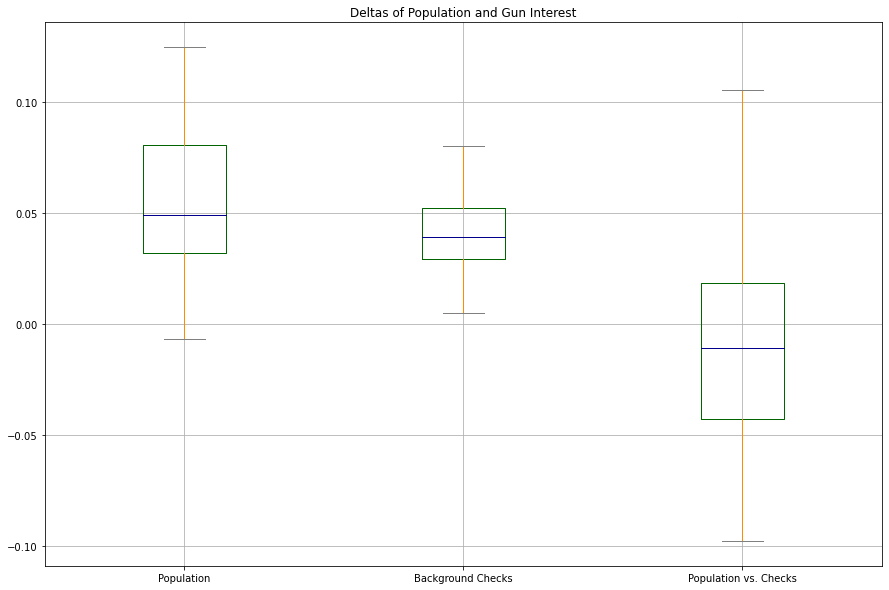

In [20]:
# FIXME: Move down two spots
# Box plot setup
labels = ['Population', 'Background Checks', 'Population vs. Checks']
relabel = dict(zip(results.columns, labels))
results.rename(columns=relabel, inplace=True)
figsize = (15,10)
title = 'Deltas of Population and Gun Interest'
grid = True
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

# Plotting

results.plot.box(figsize=figsize, title=title, grid=grid, color=color, showfliers=False)
plt.show()

## Conclusions



1. Which states saw increased interest in firearm ownership as a proportion of their population? All states, with the exception of Utah, saw an increase in firearm ownership between 2010 and 2016. When compared against population, 17 states saw an increase in firearm ownership as a share of their population while 33 states saw a decrease in firearm ownership as a share of their population.
2. What does is relationship between firearm interest and population density by state? Overall, there is a moderate negative correlation between both handgun and long gun interest with population against population density (r = -0.51). Interest in long guns has a strong positive correlation with interest in handguns (r = 0.71)
3. Which state holds the greatest interest in firearm ownership as a propotion of their population? Kentucky saw the greatest increase in interest in firearm ownership as a proportion of their population, with a 32.07% increase in interest against their population increase.
4. Which states hold the descrease interest in firearm ownership as a propotion of their population? Utah saw the greatest descrease in interest in firearm ownership as a proportion of their population, with a 27.86% decrease in interest against their population increase.
5. What is the overall trend in gun interest between 2010 and 2016? Overall, there was a mean 4.72% increase in gun ownership between 2010 and 2016, with a standard deviation of 6.17%. However, the US population increased 5.73% in the same period. Thus, overall, interest in gun ownership underpaced the growth of the US population, showing that overall interest in gun ownership did not match the overall increase in population.

### Limitations

The biggest limitation of the `gun_data.xlsx` dataset is a reflection of the varying gun laws that exist among states in the US. For instance, in California an 18 year old can buy a long gun, but cannot buy a handgun. This skews the data when comparing guns types. Furthermore, the dataset only shows that a background check was performed, thus, when comparing it with census data, it does not show *individual* gun owners as a share of the population of a state, but instead only the *background checks* performed within the state. Thus, it's impossible to say from this data whether Kentuckians became **more** armed during this period, or whether a few rogue Kentuckians just bought armed themselves to the teeth, created a skewed view that maybe people in the Bluegrass State per capita have more firearms than denizens of other states.